In [30]:
import numpy as np
import skimage
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
import os
import scipy.misc as sm
from scipy import ndimage
from scipy.ndimage.filters import convolve
from scipy import misc
import imageio
import numpy as np
plt.rcParams['figure.figsize'] = [16, 10]

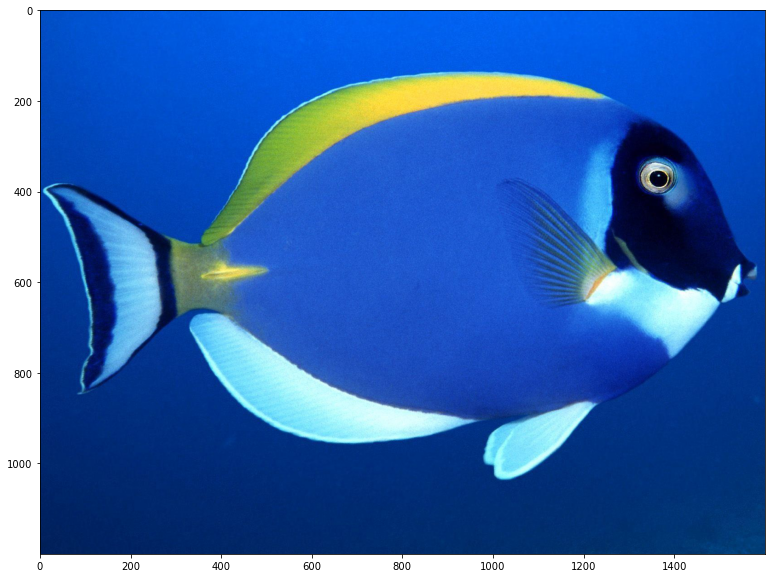

In [31]:
img = imageio.imread("2_fish.jpg")
img = img.astype('int32')
plt.imshow(img, cmap = plt.get_cmap('gray'))
plt.show()

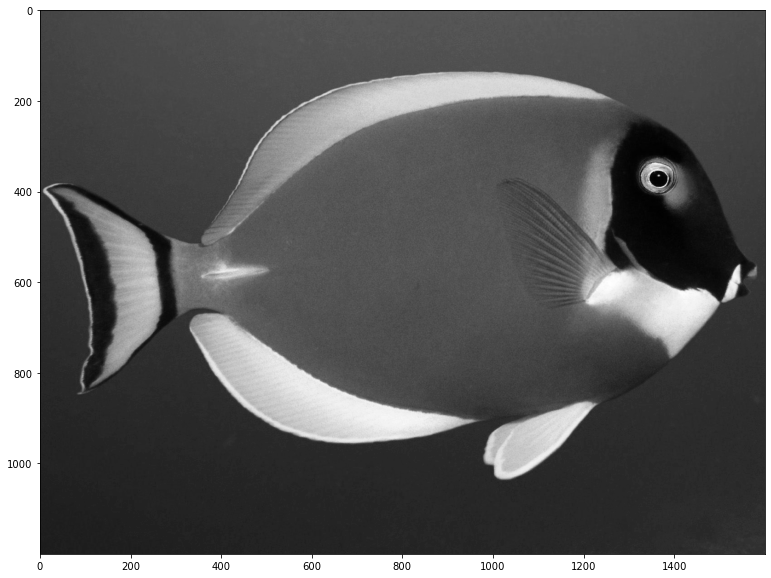

In [32]:
img_gray = np.dot(img[...,:3], [0.299, 0.587, 0.114])
plt.imshow(img_gray, cmap = plt.get_cmap('gray'))
plt.show()

In [7]:
def gaussianMask(size, sigma=1):
        size = int(size) // 2
        x, y = np.mgrid[-size:size+1, -size:size+1]
        normal = 1 / (2.0 * np.pi * sigma**2)
        mask =  np.exp(-((x**2 + y**2) / (2.0*sigma**2))) * normal
        return mask

In [64]:
def convolute(image,Filter):
    result=convolve(image,Filter,'valid')
    return result

In [8]:
def convolute_scrstch(image,Filter):
    Filter=np.flipud(np.fliplr(Filter))
    result=np.zeros_like(image)
    
    image_padded = np.zeros((image.shape[0]+2,image.shape[1]+2))
    image_padded[1:-1,1:-1]=image
    
    for x in range(image.shape[1]):
        for y in range(image.shape[0]):
            result[y,x]=(Filter * image_padded[y:y+3,x:x+3]).sum()
            
    return result

In [9]:
def sobel(image):
    filter_x=np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], np.float32)
    filter_y=np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]], np.float32)
    
    image_x=convolute_scrstch(image,filter_x)
    plt.imshow(image_x,cmap='gray')
    plt.title("horizontal edge")
    plt.show()
    
    image_y=convolute_scrstch(image,filter_y)
    plt.imshow(image_y,cmap='gray')
    plt.title("vertical edge")
    plt.show()
    
    edge=np.sqrt(np.square(image_x)+np.square(image_y))
    edge*=255.0/edge.max()
    plt.imshow(edge,cmap='gray')
    plt.title("edge")
    plt.show()
    
    gradient = np.arctan2(image_y,image_x)
    
    return (edge,gradient)

In [10]:
img_gaussian=convolute_scrstch(img_gray,gaussianMask(3, sigma=1.4))

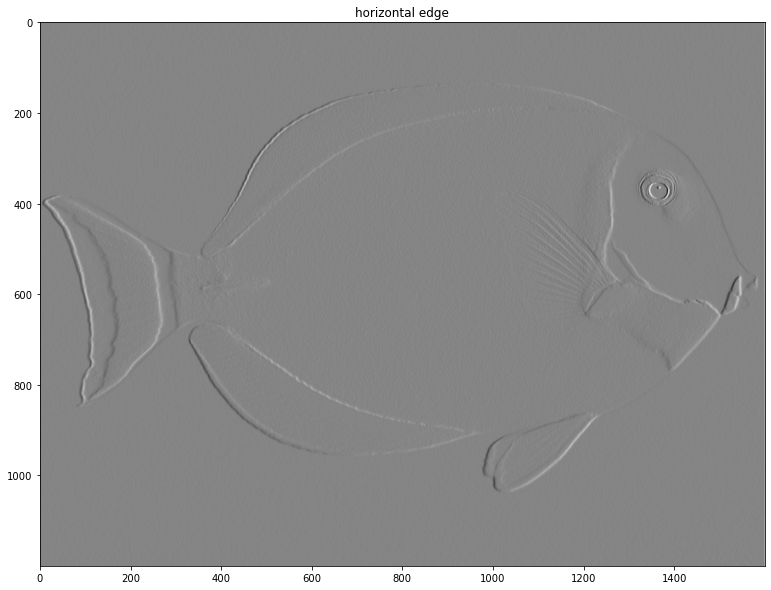

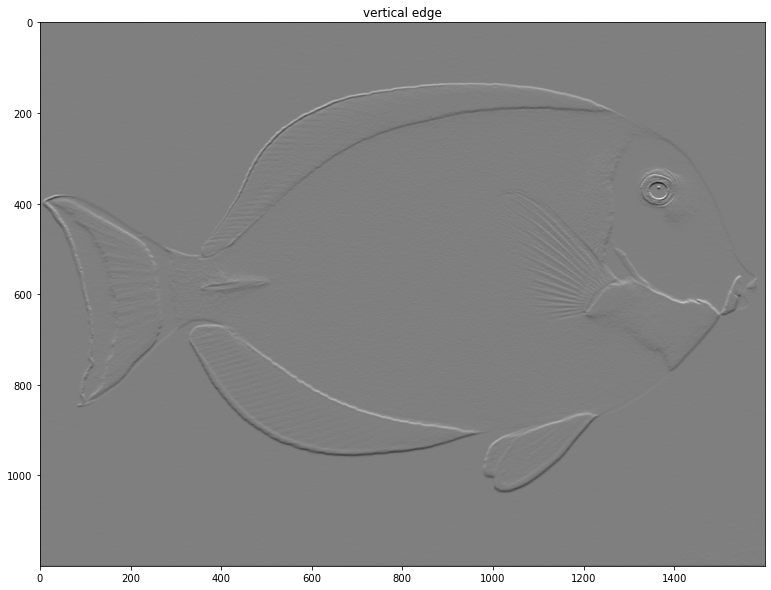

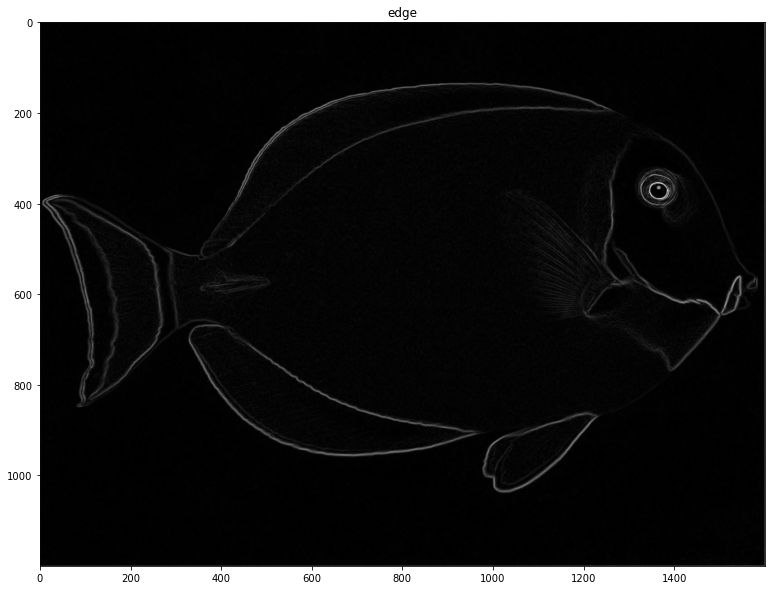

In [33]:
sobel_edge,gradient1=sobel(img_gaussian)

In [14]:
def Prewitt(image):
    filter_x=np.array([[-1, 0, 1],[-1, 0, 1],[-1, 0, 1]])
    filter_y=np.array([[-1, -1, -1],[0, 0, 0],[1, 1, 1]])
    
    image_x=convolute_scrstch(image,filter_x)
    plt.imshow(image_x,cmap='gray')
    plt.title("horizontal edge")
    plt.show()
    
    image_y=convolute_scrstch(image,filter_y)
    plt.imshow(image_y,cmap='gray')
    plt.title("vertical edge")
    plt.show()
    
    edge=np.sqrt(np.square(image_x)+np.square(image_y))
    edge*=255.0/edge.max()
    plt.imshow(edge,cmap='gray')
    plt.title(" prewitt edge")
    plt.show()
    
    gradient = np.arctan2(image_y,image_x)
    
    return (edge,gradient)

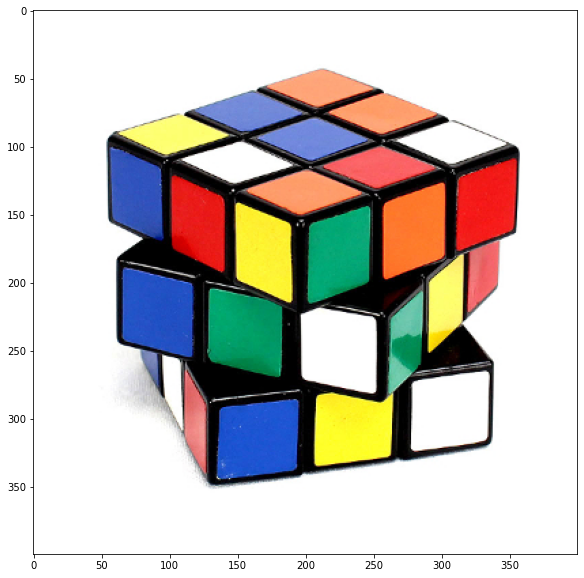

In [34]:
img2 = imageio.imread("cube.jpg")
img2 = img2.astype('int32')
plt.imshow(img2, cmap = plt.get_cmap('gray'))
plt.show()

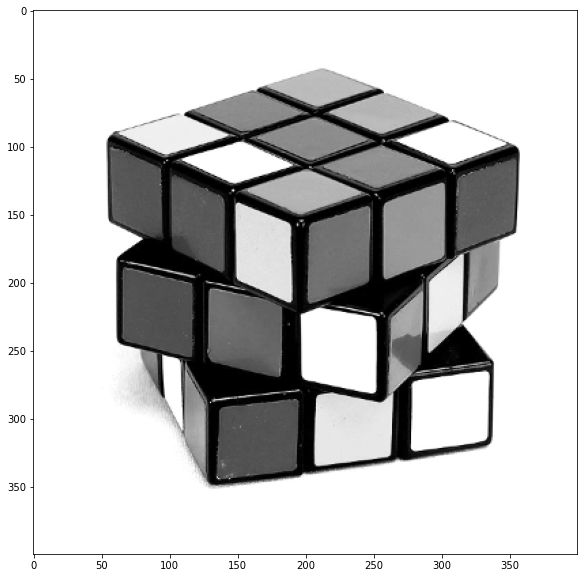

In [35]:
img2_gray = np.dot(img2[...,:3], [0.299, 0.587, 0.114])
plt.imshow(img2_gray, cmap = plt.get_cmap('gray'))
plt.show()

In [36]:
img2_gaussian=convolute_scrstch(img2_gray,gaussianMask(3, sigma=1.4))

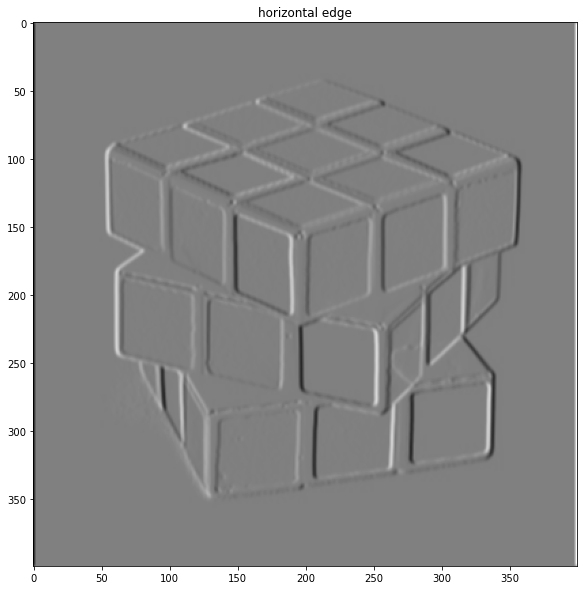

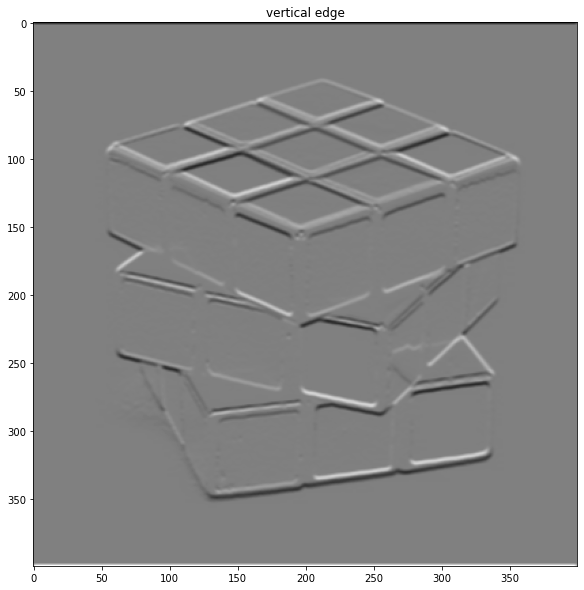

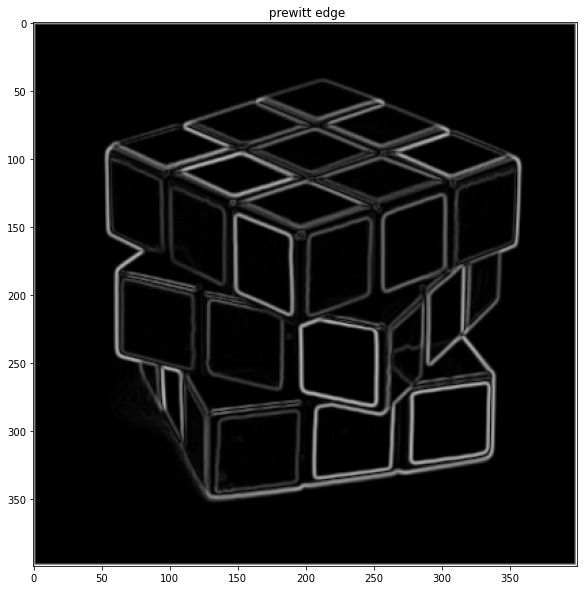

In [37]:
prewitt_edge,gradient2=Prewitt(img2_gaussian)

In [23]:
def firstDerivativeEdgeDetector(image):
    filter_x=np.array([[-1, 0, 1]])
    filter_y=np.flip(filter_x.T, axis=0)
    
    image_x=convolute_scrstch(image,filter_x)
    plt.imshow(image_x,cmap='gray')
    plt.title("horizontal edge")
    plt.show()
    
    image_y=convolute_scrstch(image,filter_y)
    plt.imshow(image_y,cmap='gray')
    plt.title("vertical edge")
    plt.show()
    
    edge=np.sqrt(np.square(image_x)+np.square(image_y))
    edge*=255.0/edge.max()
    plt.imshow(edge,cmap='gray')
    plt.title(" first order edge")
    plt.show()
    
    gradient = np.arctan2(image_y,image_x)
    
    return (edge,gradient)
    
    

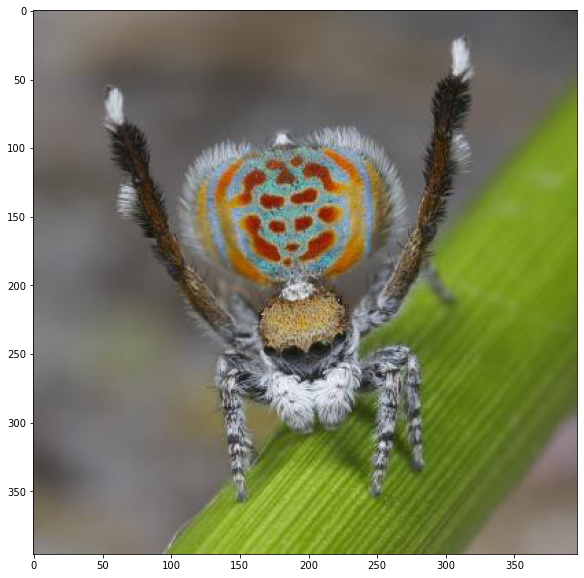

In [38]:
img3 = imageio.imread("spider.jpeg")
img3 = img3.astype('int32')
plt.imshow(img3, cmap = plt.get_cmap('gray'))
plt.show()

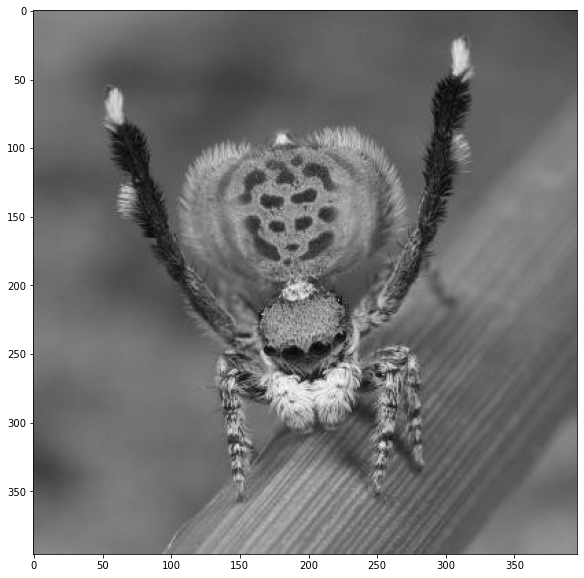

In [39]:
img3_gray = np.dot(img3[...,:3], [0.299, 0.587, 0.114])
plt.imshow(img3_gray, cmap = plt.get_cmap('gray'))
plt.show()

In [40]:
img3_gaussian=convolute_scrstch(img3_gray,gaussianMask(3, sigma=1.4))

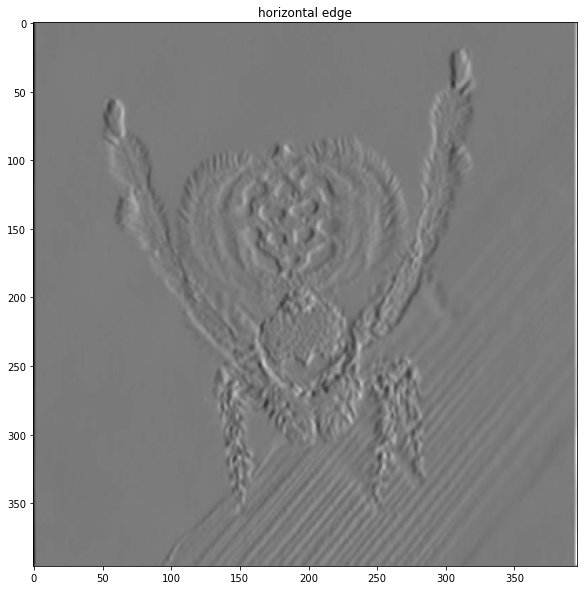

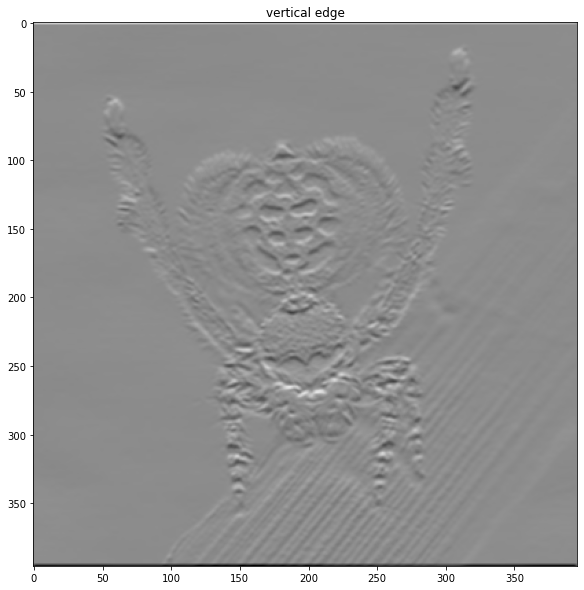

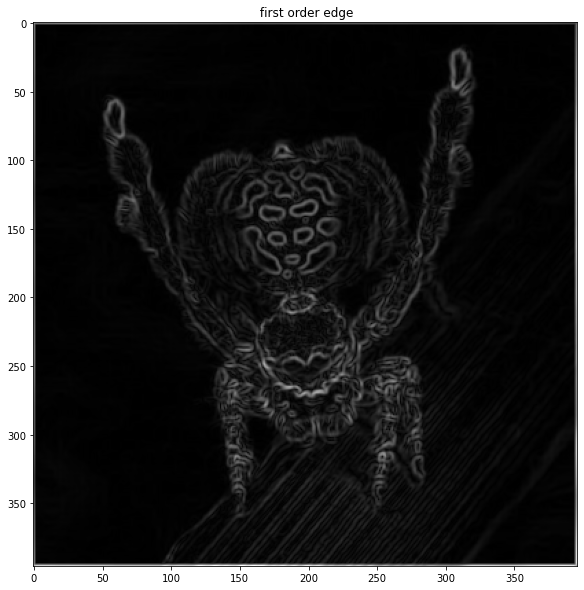

In [41]:
first_order_detector,gradient3=firstDerivativeEdgeDetector(img3_gaussian)

In [25]:
def secondDerivativeEdgeDetector(image):
    filter_x=np.array([[1, -2, 1]])
    filter_y=np.flip(filter_x.T, axis=0)
    
    image_x=convolute_scrstch(image,filter_x)
    plt.imshow(image_x,cmap='gray')
    plt.title("horizontal edge")
    plt.show()
    
    image_y=convolute_scrstch(image,filter_y)
    plt.imshow(image_y,cmap='gray')
    plt.title("vertical edge")
    plt.show()
    
    edge=np.sqrt(np.square(image_x)+np.square(image_y))
    edge*=255.0/edge.max()
    plt.imshow(edge,cmap='gray')
    plt.title(" second order edge")
    plt.show()
    
    gradient = np.arctan2(image_y,image_x)
    
    return (edge,gradient)
    

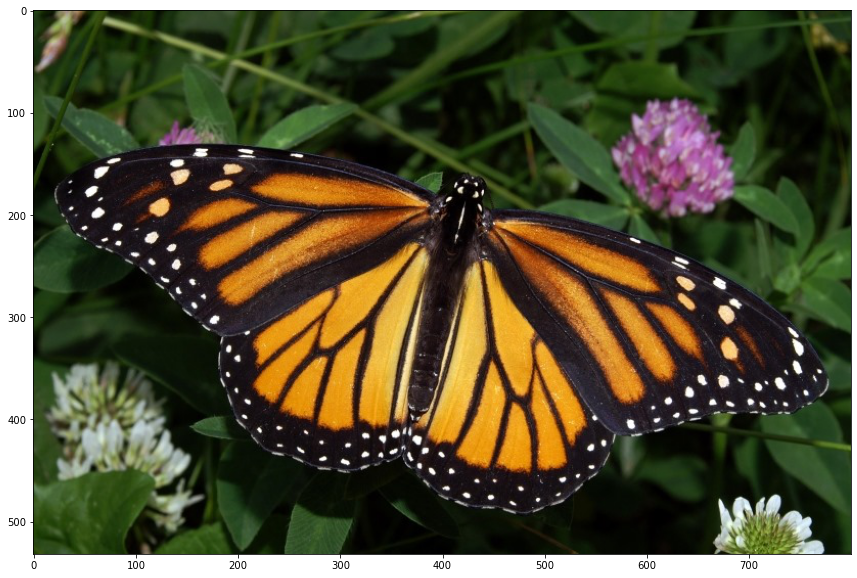

In [42]:
img4 = imageio.imread("fly.jpg")
img4 = img4.astype('int32')
plt.imshow(img4, cmap = plt.get_cmap('gray'))
plt.show()

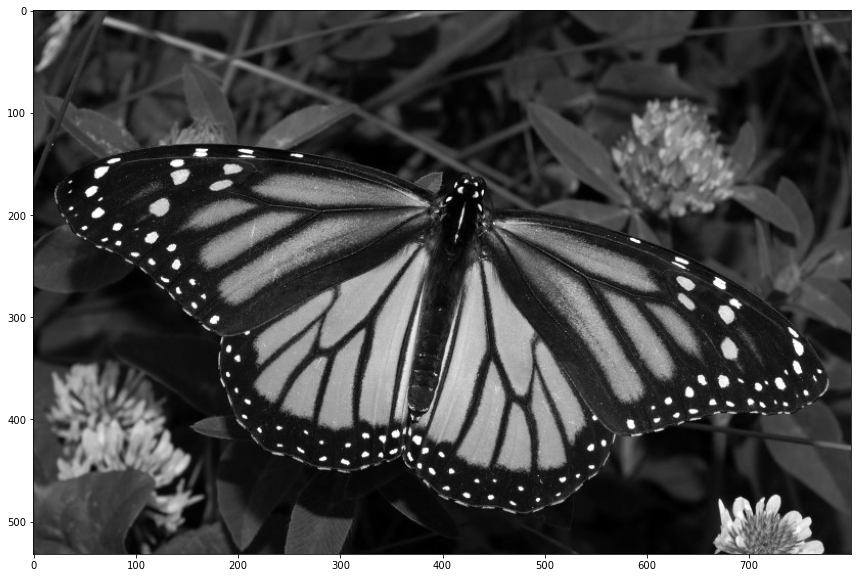

In [43]:
img4_gray = np.dot(img4[...,:3], [0.299, 0.587, 0.114])
plt.imshow(img4_gray, cmap = plt.get_cmap('gray'))
plt.show()

In [44]:
img4_gaussian=convolute_scrstch(img4_gray,gaussianMask(3, sigma=1.4))

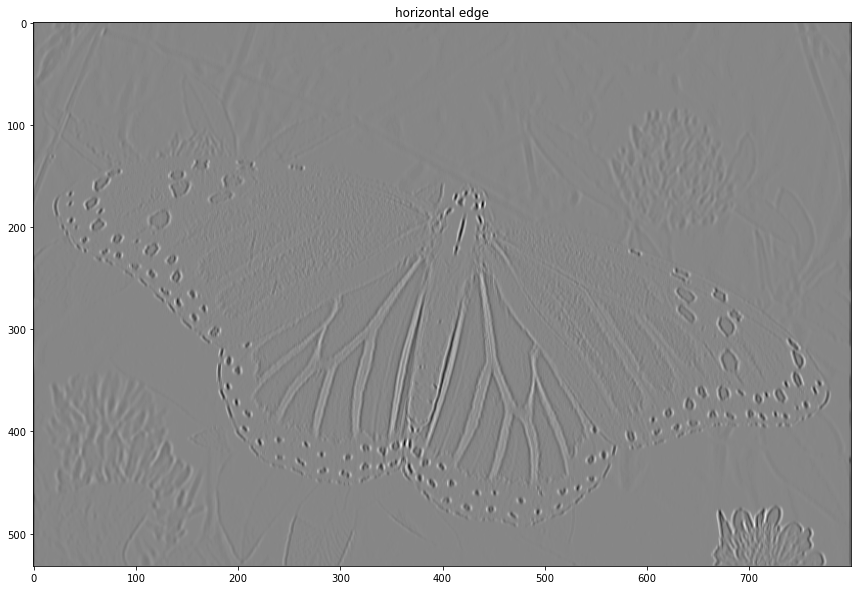

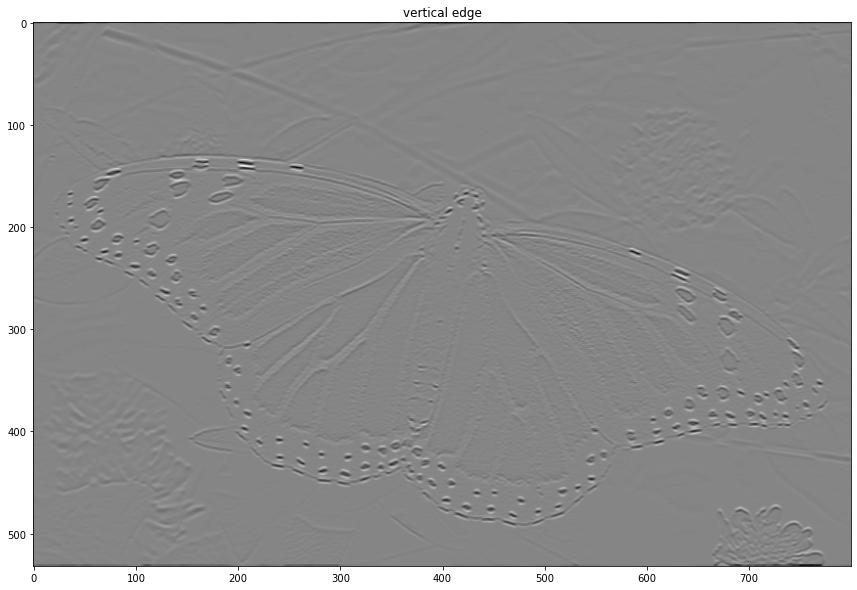

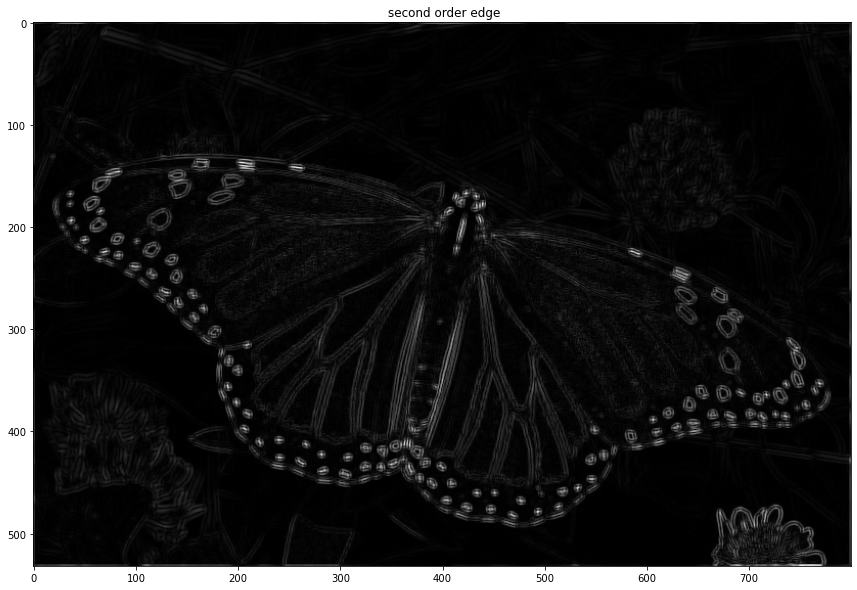

In [45]:
second_order_detect,gradient4=secondDerivativeEdgeDetector(img4_gaussian)

In [54]:
def non_maxima_suppression(image,angles):
    M, N = image.shape
    result_img = np.zeros((M,N), dtype=np.int32)
    D = angles * 180. / np.pi
    D[D < 0] += 180

    
    for i in range(1,M-1):
        for j in range(1,N-1):
            try:
                q = 255
                r = 255
                
               #angle 0
                if (0 <= D[i,j] < 22.5) or (157.5 <= D[i,j] <= 180):
                    q = image[i, j+1]
                    r = image[i, j-1]
                #angle 45
                elif (22.5 <= D[i,j] < 67.5):
                    q = image[i+1, j-1]
                    r = image[i-1, j+1]
                #angle 90
                elif (67.5 <= D[i,j] < 112.5):
                    q = image[i+1, j]
                    r = image[i-1, j]
                #angle 135
                elif (112.5 <= D[i,j] < 157.5):
                    q = image[i-1, j-1]
                    r = image[i+1, j+1]

                if (image[i,j] >= q) and (image[i,j] >= r):
                    result_img[i,j] = image[i,j]
                else:
                    result_img[i,j] = 0

            except IndexError as e:
                pass
    
    return result_img

In [46]:
def double_threshold(image):
    highThreshold = image.max() * 0.15;
    lowThreshold = highThreshold * 0.09;
    
    M, N = image.shape
    result = np.zeros((M,N), dtype=np.int32)
    
    weak = np.int32(25)
    strong = np.int32(255)
    
    strong_i, strong_j = np.where(image >= highThreshold)
    zeros_i, zeros_j = np.where(image < lowThreshold)
    
    weak_i, weak_j = np.where((image <= highThreshold) & (image >= lowThreshold))
    
    result[strong_i, strong_j] = strong
    result[weak_i, weak_j] = weak
    
    return (result, weak, strong)

In [47]:
def Edge_Linking(image, weak, strong=255):
    M, N = image.shape  
    for i in range(1, M-1):
        for j in range(1, N-1):
            if (image[i,j] == weak):
                try:
                    if ((image[i+1, j-1] == strong) or (image[i+1, j] == strong) or (image[i+1, j+1] == strong)
                        or (image[i, j-1] == strong) or (image[i, j+1] == strong)
                        or (image[i-1, j-1] == strong) or (image[i-1, j] == strong) or (image[i-1, j+1] == strong)):
                        image[i, j] = strong
                    else:
                        image[i, j] = 0
                except IndexError as e:
                    pass
    return image

In [48]:
def canny(image):
    image_sobel,gradient5=sobel(image)
    
    non_maima_result=non_maxima_suppression(image_sobel,gradient5)
    plt.imshow(non_maima_result, cmap = plt.get_cmap('gray'))
    plt.title("non_maxima_suppression")
    plt.show()
    
    threshold_result, weak, strong=double_threshold(non_maima_result)
    
    edge_link_result=Edge_Linking(threshold_result, weak, strong)
    plt.imshow(edge_link_result, cmap = plt.get_cmap('gray'))
    plt.title("Edge_Linking")
    plt.show()
    
    return edge_link_result

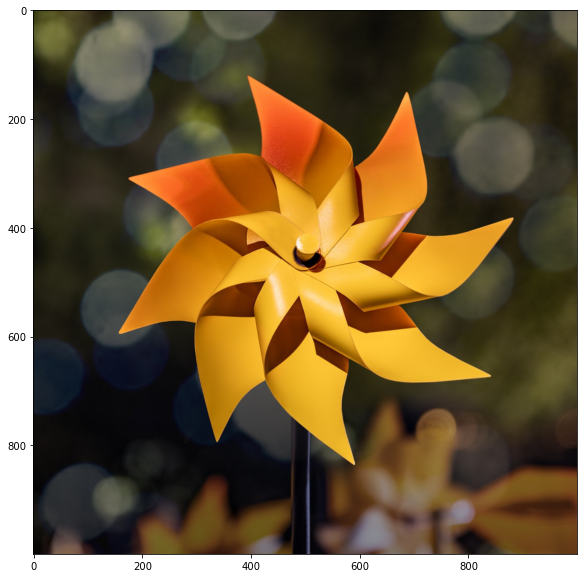

In [50]:
img5 = imageio.imread("flower.jpg")
img5 = img5.astype('int32')
plt.imshow(img5, cmap = plt.get_cmap('gray'))
plt.show()

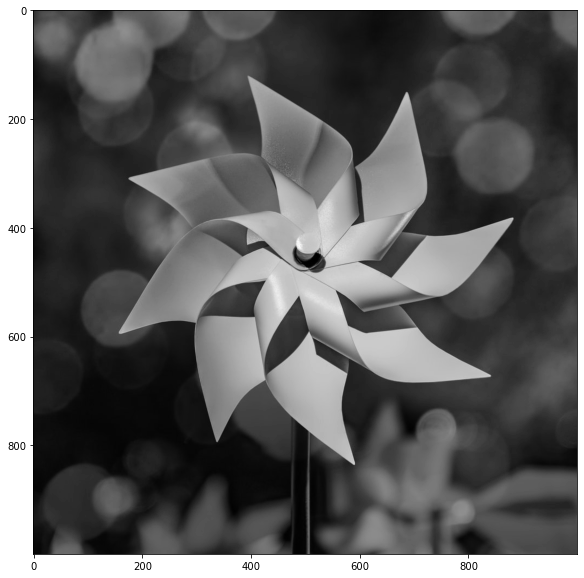

In [51]:
img5_gray = np.dot(img5[...,:3], [0.299, 0.587, 0.114])
plt.imshow(img5_gray, cmap = plt.get_cmap('gray'))
plt.show()

In [52]:
img5_gaussian=convolute_scrstch(img5_gray,gaussianMask(3, sigma=1.4))

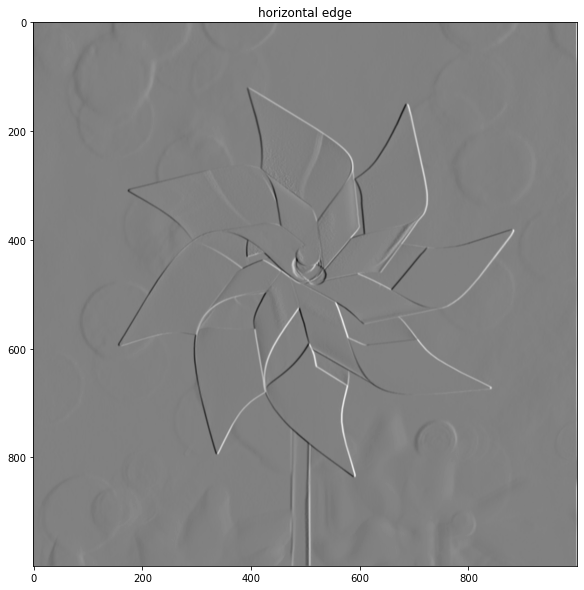

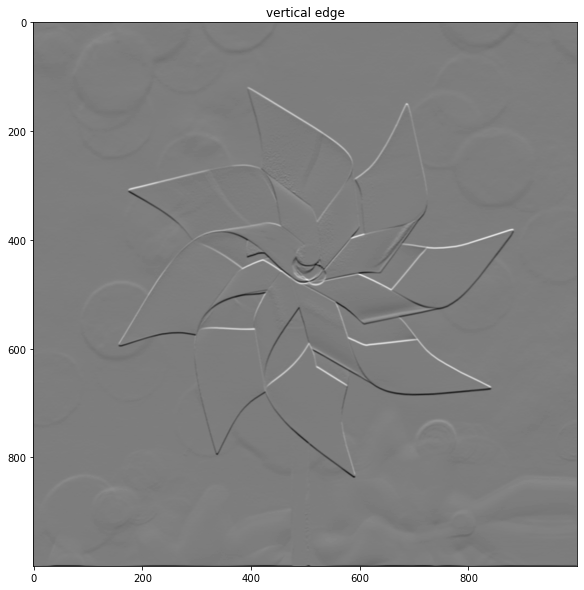

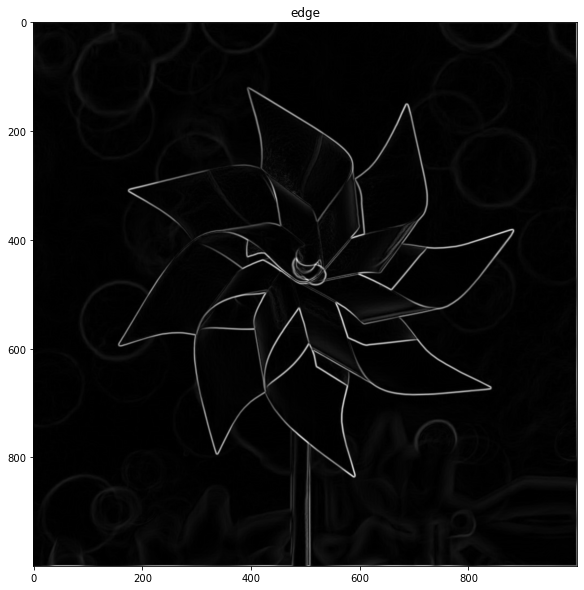

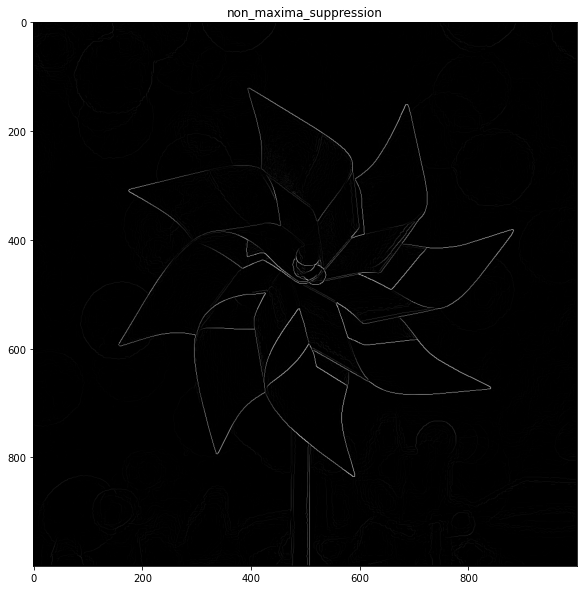

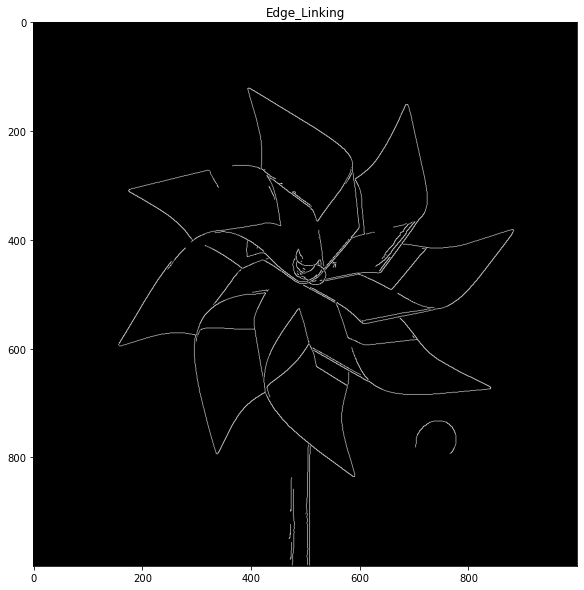

In [55]:
canny_edge_detector=canny(img5_gaussian)